<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/DLthon/dathon3_jellyjellyfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [10]:
#1. 라이브러리 임포트 및 데이터 로드
import os  # 운영 체제와 상호작용하기 위한 모듈
import numpy as np  # 수치 연산을 위한 라이브러리
import pandas as pd  # 데이터 조작을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns  # 고급 데이터 시각화를 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.metrics import classification_report, confusion_matrix  # 성능 평가를 위한 함수
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 전처리를 위한 함수
from tensorflow.keras.models import Sequential  # 순차 모델 생성을 위한 클래스
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN 레이어

# 데이터 경로 설정
# 데이터 경로 설정
base_dir = "C:/Users/young/Downloads/Train_Test_Valid"  # 기본 경로
train_dir = os.path.join(base_dir, 'Train')  # 대문자로 수정
valid_dir = os.path.join(base_dir, 'valid')  # 소문자 그대로
test_dir = os.path.join(base_dir, 'test')  # 소문자 그대로

In [4]:
#모든 패키지를 최신 버젼으로 업데이트
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolve

In [15]:
import os

# 경로 설정
train_dir = "C:/Users/young/Downloads/Train_Test_Valid/Train"

# 경로가 존재하는지 확인
if os.path.exists(train_dir):
    print("Train directory exists.")
    print("Contents:", os.listdir(train_dir))  # 디렉토리 내의 파일 목록 출력
else:
    print("Train directory does not exist.")

Train directory does not exist.


In [16]:
#zip 파일 업로드
from google.colab import files

uploaded = files.upload()  # 파일 업로드 창 열기

Saving Train_Test_Valid.zip to Train_Test_Valid.zip


In [17]:
#zip 파일 압축해제
import zipfile
import os

# 압축 해제할 ZIP 파일 이름
zip_file_name = 'Train_Test_Valid.zip'

# ZIP 파일 경로
zip_file_path = f'/content/{zip_file_name}'

# 압축 해제할 디렉토리 경로
extract_dir = '/content/Train_Test_Valid'

# ZIP 파일 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)  # 지정한 디렉토리로 압축 해제

# 압축 해제 결과 확인
os.listdir(extract_dir)

['Train_Test_Valid']

In [19]:
# 압축 해제 결과 확인
extracted_content = os.listdir(extract_dir)
print(extracted_content)  # 내용 확인

['Train_Test_Valid']


In [20]:
# 내부 폴더 내용 확인
inner_dir = os.path.join(extract_dir, 'Train_Test_Valid')
inner_content = os.listdir(inner_dir)
print(inner_content)  # 내부 내용 확인

['Train', 'valid', 'test']


In [21]:
# 데이터 경로 설정
train_dir = os.path.join(inner_dir, 'Train')  # Train 폴더 경로
valid_dir = os.path.join(inner_dir, 'valid')  # valid 폴더 경로
test_dir = os.path.join(inner_dir, 'test')    # test 폴더 경로

# 경로 확인
print("Train directory:", train_dir)
print("Valid directory:", valid_dir)
print("Test directory:", test_dir)

Train directory: /content/Train_Test_Valid/Train_Test_Valid/Train
Valid directory: /content/Train_Test_Valid/Train_Test_Valid/valid
Test directory: /content/Train_Test_Valid/Train_Test_Valid/test


In [33]:
# 훈련 데이터와 검증 데이터의 중복 확인
train_files = set(os.listdir(train_dir))  # 훈련 데이터 파일 목록
valid_files = set(os.listdir(valid_dir))  # 검증 데이터 파일 목록

In [34]:
# 데이터 누출 확인
duplicate_files = train_files.intersection(valid_files)
if duplicate_files:
    print("중복 데이터 발견:", duplicate_files)  # 중복 데이터 출력
else:
    print("중복 데이터 없음")

중복 데이터 발견: {'Moon_jellyfish', 'mauve_stinger_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'blue_jellyfish', 'barrel_jellyfish'}


In [35]:
# 중복 데이터 검수 함수 정의
def find_duplicates(directory):
    hashes = {}  # 파일 해시를 저장할 딕셔너리
    duplicates = []  # 중복 파일 목록

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()  # 파일 해시 생성
            if file_hash in hashes:
                duplicates.append(filename)  # 중복 파일 추가
            else:
                hashes[file_hash] = filename  # 해시 저장
    return duplicates

In [37]:
import hashlib  # hashlib 임포트 추가
# 각 클래스 폴더에서 중복 검사
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        duplicates = find_duplicates(cls_path)
        if duplicates:
            print(f"{cls} 클래스에서 중복된 이미지:", duplicates)  # 중복 이미지 출력

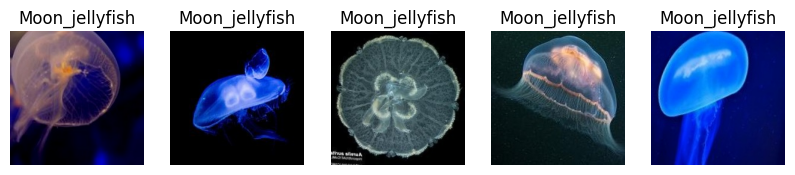

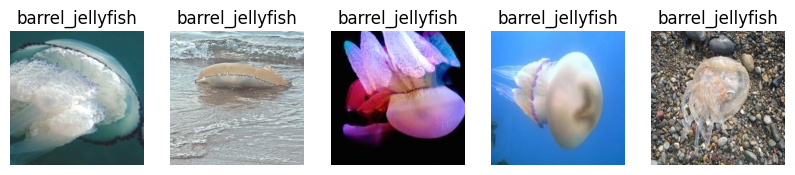

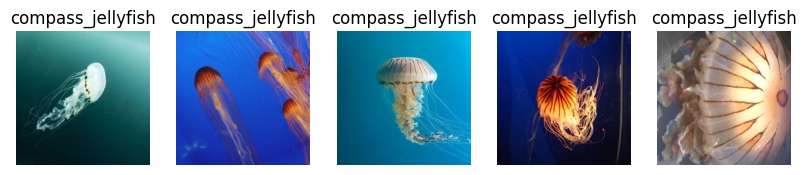

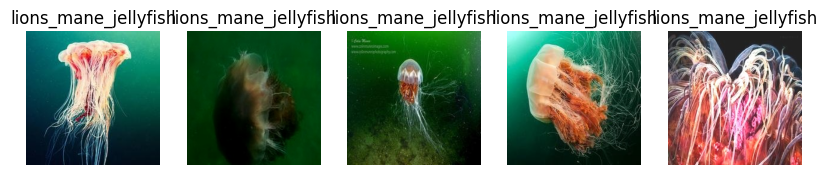

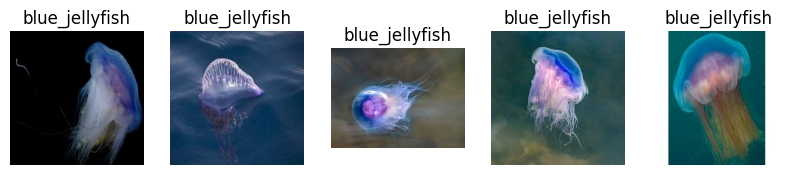

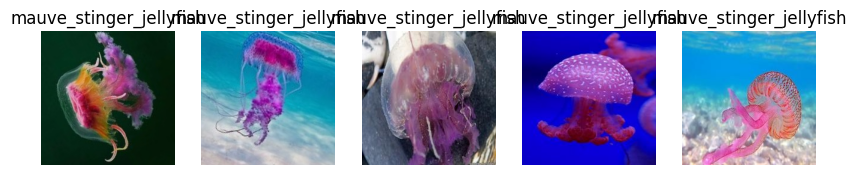

In [39]:
import matplotlib.image as mpimg  # mpimg 임포트 추가
# 특정 클래스의 라벨링 오류 확인 (샘플 이미지 시각화)
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        # 샘플 이미지 몇 개 표시
        sample_files = os.listdir(cls_path)[:5]  # 첫 5개 이미지 샘플
        plt.figure(figsize=(10, 5))
        for i, file in enumerate(sample_files):
            img = mpimg.imread(os.path.join(cls_path, file))  # 이미지 읽기
            plt.subplot(1, 5, i + 1)  # 서브플롯 설정
            plt.imshow(img)  # 이미지 표시
            plt.title(cls)  # 제목에 클래스 이름 추가
            plt.axis('off')  # 축 숨기기
        plt.show()  # 샘플 이미지 출력

In [40]:
#2. 데이터 탐색적 분석(EDA)_데이터의 분포 및 클래스 확인 __ 함수정의
def plot_class_distribution(directory):
    classes = os.listdir(directory)  # 디렉토리 내 클래스 목록 가져오기
    counts = [len(os.listdir(os.path.join(directory, cls))) for cls in classes]  # 각 클래스의 이미지 개수 세기

    plt.figure(figsize=(10, 5))  # 그래프 크기 설정
    sns.barplot(x=classes, y=counts)  # 클래스별 이미지 개수 바 그래프 생성
    plt.title('Class Distribution')  # 제목 설정
    plt.xlabel('Classes')  # x축 레이블 설정
    plt.ylabel('Number of Images')  # y축 레이블 설정
    plt.show()  # 그래프 출력

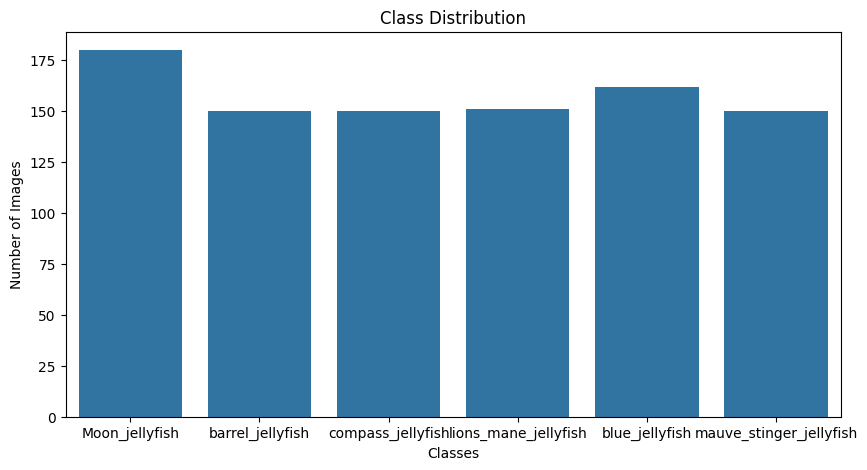

In [41]:
# 데이터 탐색적 분석 __ 함수 호출
plot_class_distribution(train_dir)  # 학습 데이터의 클래스 분포 시각화

In [42]:
#3. 데이터 전처리_ 이미지 크기 조정, 정규

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 및 전처리 설정
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # 정규화
    rotation_range=40,  # 회전
    width_shift_range=0.2,  # 수평 이동
    height_shift_range=0.2,  # 수직 이동
    shear_range=0.2,  # 전단 변형
    zoom_range=0.2,  # 확대
    horizontal_flip=True,  # 수평 반전
    fill_mode='nearest'  # 빈 공간 채우기
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # 이미지 크기
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

Found 943 images belonging to 6 classes.


In [43]:
#4. 모델 구성_CNN 모델(합성곱 신경망)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(os.listdir(train_dir)), activation='softmax')  # 클래스 수에 맞춰 출력
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
#5. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
#6. 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10  # 원하는 에폭 수 설정
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.2454 - loss: 2.0790
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3858 - loss: 1.5392
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4599 - loss: 1.4026
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5296 - loss: 1.2413
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5433 - loss: 1.1588
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5655 - loss: 1.1473
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6081 - loss: 1.0667
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6354 - loss: 1.0183
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5692 - loss: 1.0876
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6524 - loss: 0.9304


In [32]:
#7. 평가 및 예측
# 검증 데이터 전처리 (valid_dir 사용)
valid_datagen = ImageDataGenerator(rescale=1.0/255) # 검증 데이터 정규화

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 모델 평가
model.evaluate(valid_generator)

Found 44 images belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.6837 - loss: 1.0035


[0.979509711265564, 0.6818181872367859]